In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# SMOTE and Near Miss
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler


from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.explainers import MetricTextExplainer, MetricJSONExplainer
# from aif360.algorithms.preprocessing import Reweighing

plt.style.use("fivethirtyeight")

from IPython.display import display, HTML

import warnings
print('Ok')

Ok


In [2]:

data = pd.read_csv("""..\data\interim\data_100000-5percent.csv""")
data2 = data.drop(['customer'], axis=1)
# data2 = data2.drop(['tenure'], axis=1)
# data2 = data2.drop(['comeback_product'], axis=1)

data2['gender'] = data2['gender'].astype(int)
# data2['churn'] = data2['churn'].astype(object)
data2['is_senior'] = data2['is_senior'].astype(int)
data2['contract_period'] = data2['contract_period'].astype(object)

numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

data2 = pd.get_dummies(data2)

X_original = data2.drop('churn', axis=1)
y_original = data2['churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)
print(len(data2.keys()))
data2.keys()

Numerical: Index(['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage'],
      dtype='object')

Categorical: Index(['contract_period', 'race', 't_location'], dtype='object')
46


Index(['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 'contract_period_1', 'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36'],
      dtype='object')

In [3]:
models = []
models.append(('Random Forest', RandomForestClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression(max_iter=1000)))

models.append(('XGBClassifier', XGBClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

methods = ['original', 'adasyn', 'smote', 'rus', 'ros']

In [4]:
# AIF360 Dataset Preparation

all_labels = ['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 
        # 'contract_period_1', 
        'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36']

features = ['age', 'gender', 'hsbb_area', 'speed', 'price_start', 'complain_count',
       'churn', 'median_outstanding', 'technical_problem_count', 'is_senior',
       'avg_download', 'avg_upload', 'avg_voice_usage', 'race_B', 'race_C',
       'race_I', 'race_M', 'race_O', 't_location_Zone-AJP',
       't_location_Zone-AKM', 't_location_Zone-BAL', 't_location_Zone-BKK',
       't_location_Zone-BLS', 't_location_Zone-CSM', 't_location_Zone-GCK',
       't_location_Zone-GHP', 't_location_Zone-GPP', 't_location_Zone-GRT',
       't_location_Zone-IRM', 't_location_Zone-KDS', 't_location_Zone-KRP',
       't_location_Zone-NSN', 't_location_Zone-PBP', 't_location_Zone-PDK',
       't_location_Zone-RLK', 't_location_Zone-SRJ', 't_location_Zone-TLK',
       't_location_Zone-TLS', 't_location_Zone-UBS', 't_location_Zone-URJ',
       't_location_Zone-UWT', 
        # 'contract_period_1', 
        'contract_period_12',
       'contract_period_18', 'contract_period_24', 'contract_period_36']


class TMDataset(StandardDataset):
    def __init__(self, 
             label_name='churn',
             favorable_classes=[1.0],
                 
             protected_attribute_names=[
                'gender', 
#                 'is_senior',
#                 'race_O',
             ],
    
             privileged_classes=[
                [1.0,], 
#                 [0.0,],
#                 [0.0,],
             ],
                 
             instance_weights_name=None,
             categorical_features=[],
             features_to_keep=features, 
             features_to_drop=[],
             custom_preprocessing=None,
             metadata=None,
             csv_file_name='',
             data_frame=None,
    ):
        
        if data_frame is not None:
            aif_df = data_frame
        else:
            aif_df = pd.read_csv(csv_file_name)
        
        #df.reset_index(drop=True, inplace=True)
        # Preprocessing
        
        super().__init__(
            df=aif_df, label_name=label_name,
            favorable_classes=favorable_classes,
            protected_attribute_names=protected_attribute_names,
            privileged_classes=privileged_classes,
            instance_weights_name=instance_weights_name,
            categorical_features=categorical_features,
            features_to_keep=features_to_keep,
            features_to_drop=features_to_drop,
            custom_preprocessing=custom_preprocessing, 
            metadata=metadata,
     
        )

In [5]:
def make_sampling(method_name, X, y):
    if method_name == 'original':
        return (X, y)
    elif method_name == 'adasyn':
        adasyn = ADASYN(sampling_strategy='minority', random_state=420, n_neighbors=5)
        return adasyn.fit_sample(X, y)
    elif method_name == 'smote':
        os = SMOTE(random_state=41)
        return os.fit_sample(X, y)
    elif method_name == 'ros':
        random_over_sampler = RandomOverSampler(random_state=42)
        return random_over_sampler.fit_resample(X, y)
    elif method_name == 'rus':
        random_under_sampler = RandomUnderSampler(random_state=42)
        return random_under_sampler.fit_resample(X, y)
    else:
        print('UNKNOWN METHOD !!') 


Charn values Original
0    95000
1     5000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    63606
1     3394
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    31394
1     1606
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.96837
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     32109
           1       0.46      0.82      0.59       891

    accuracy                           0.97     33000
   macro avg       0.73      0.90      0.79     33000
weighted avg       0.98      0.97      0.97     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20046
0    12954
Name: gender, dtype: int64


              counter
churn gender         
0     0         12651
      1         19458
1     0           303
      1           588
# # # # # # # # # # 
[[31238   156]
 [  871   735]]


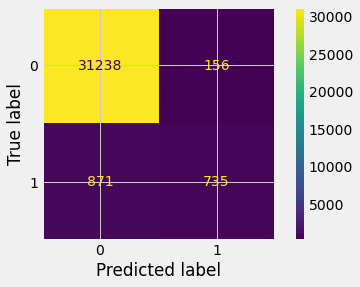




ROC AUC Score 0.9205280498347798
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.005942076623488071

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.7974236938870036

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 891.0, 'FP': 0.0, 'TN': 32109.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.005942,891.0,32109.0,[0.9929818181818182],0.797424,[0.9929818181818182],-0.005942


Charn values Original
0    95000
1    94784
Name: churn, dtype: int64
Total data: 189784

Charn values Train
0    63708
1    63447
Name: churn, dtype: int64
Total data: 127155

Charn values Test
1    31337
0    31292
Name: churn, dtype: int64
Total data: 62629


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9732596209539459
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     31748
           1       0.97      0.99      0.98     30881

    accuracy                           0.98     62629
   macro avg       0.98      0.98      0.98     62629
weighted avg       0.98      0.98      0.98     62629


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33576
0    29053
Name: gender, dtype: int64


              counter
churn gender         
0     0         12546
      1         19202
1     0         16507
      1         14374
# # # # # # # # # # 
[[30952   340]
 [  796 30541]]


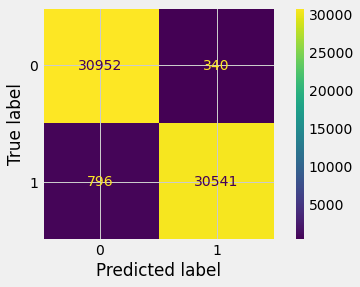




ROC AUC Score 0.9970300696410981
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.14006511240649056

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3271758880033622

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 30881.0, 'FP': 0.0, 'TN': 31748.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.140065,30881.0,31748.0,[0.8182279774545257],1.327176,[0.8182279774545257],0.140065


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9802473684210528
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     31858
           1       0.97      0.99      0.98     30842

    accuracy                           0.98     62700
   macro avg       0.98      0.98      0.98     62700
weighted avg       0.98      0.98      0.98     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33663
0    29037
Name: gender, dtype: int64


              counter
churn gender         
0     0         12568
      1         19290
1     0         16469
      1         14373
# # # # # # # # # # 
[[31007   331]
 [  851 30511]]


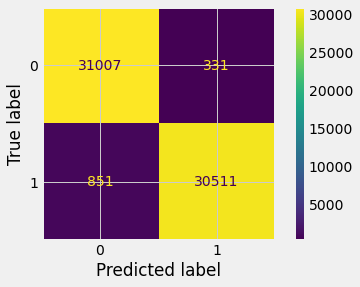




ROC AUC Score 0.9966140702033441
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.14020562384478913

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3283755594160673

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 30842.0, 'FP': 0.0, 'TN': 31858.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.140206,30842.0,31858.0,[0.8444242424242485],1.328376,[0.8444242424242485],0.140206


Charn values Original
1    5000
0    5000
Name: churn, dtype: int64
Total data: 10000

Charn values Train
1    3378
0    3322
Name: churn, dtype: int64
Total data: 6700

Charn values Test
0    1678
1    1622
Name: churn, dtype: int64
Total data: 3300


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8359
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1674
           1       0.84      0.84      0.84      1626

    accuracy                           0.84      3300
   macro avg       0.84      0.84      0.84      3300
weighted avg       0.84      0.84      0.84      3300


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    2086
0    1214
Name: gender, dtype: int64


              counter
churn gender         
0     0           658
      1          1016
1     0           556
      1          1070
# # # # # # # # # # 
[[1413  265]
 [ 261 1361]]


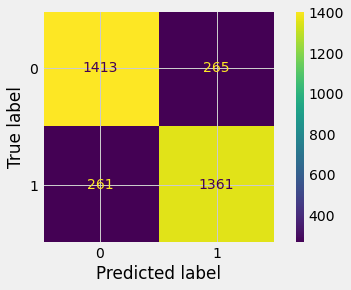




ROC AUC Score 0.9337678876120802
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.05495331708526757

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8928667108038615

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 1626.0, 'FP': 0.0, 'TN': 1674.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.054953,1626.0,1674.0,[0.7550303030303018],0.892867,[0.7550303030303018],-0.054953


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9960000000000001
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30988
           1       1.00      0.99      0.99     31712

    accuracy                           0.99     62700
   macro avg       0.99      0.99      0.99     62700
weighted avg       0.99      0.99      0.99     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    39824
0    22876
Name: gender, dtype: int64


              counter
churn gender         
0     0         12318
      1         18670
1     0         10558
      1         21154
# # # # # # # # # # 
[[30988   350]
 [    0 31362]]


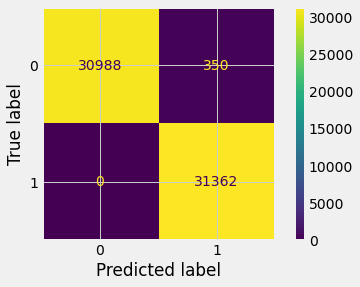




ROC AUC Score 0.9998538504958469
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.06965548746711442

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8688682928575984

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 31712.0, 'FP': 0.0, 'TN': 30988.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.069655,31712.0,30988.0,[0.921795853269539],0.868868,[0.921795853269539],-0.069655


Charn values Original
0    95000
1     5000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    63606
1     3394
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    31394
1     1606
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9686
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     31997
           1       0.47      0.76      0.58      1003

    accuracy                           0.97     33000
   macro avg       0.73      0.87      0.78     33000
weighted avg       0.98      0.97      0.97     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20046
0    12954
Name: gender, dtype: int64


              counter
churn gender         
0     0         12613
      1         19384
1     0           341
      1           662
# # # # # # # # # # 
[[31150   244]
 [  847   759]]


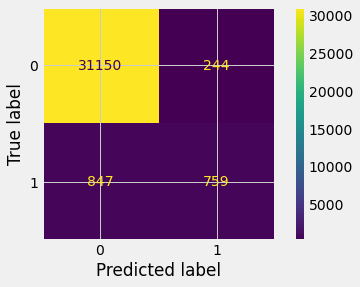




ROC AUC Score 0.9398315178848891
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.006700129304267624

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.7971136072003795

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 1003.0, 'FP': 0.0, 'TN': 31997.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.0067,1003.0,31997.0,[0.9895939393939395],0.797114,[0.9895939393939395],-0.0067


Charn values Original
0    95000
1    94784
Name: churn, dtype: int64
Total data: 189784

Charn values Train
0    63708
1    63447
Name: churn, dtype: int64
Total data: 127155

Charn values Test
1    31337
0    31292
Name: churn, dtype: int64
Total data: 62629


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9719423836289296
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     32116
           1       0.97      0.99      0.98     30513

    accuracy                           0.98     62629
   macro avg       0.98      0.98      0.98     62629
weighted avg       0.98      0.98      0.98     62629


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33576
0    29053
Name: gender, dtype: int64


              counter
churn gender         
0     0         12732
      1         19384
1     0         16321
      1         14192
# # # # # # # # # # 
[[31054   238]
 [ 1062 30275]]


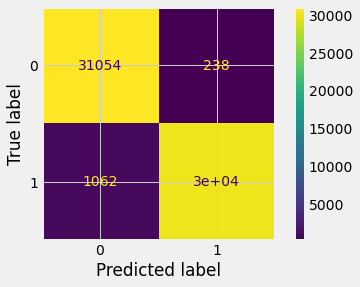




ROC AUC Score 0.996605757381752
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.1390835581592722

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.329049432691356

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 30513.0, 'FP': 0.0, 'TN': 32116.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.139084,30513.0,32116.0,[0.8174200450270557],1.329049,[0.8174200450270557],0.139084


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9779157894736843
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     32177
           1       0.97      0.99      0.98     30523

    accuracy                           0.98     62700
   macro avg       0.98      0.98      0.98     62700
weighted avg       0.98      0.98      0.98     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33663
0    29037
Name: gender, dtype: int64


              counter
churn gender         
0     0         12753
      1         19424
1     0         16284
      1         14239
# # # # # # # # # # 
[[31111   227]
 [ 1066 30296]]


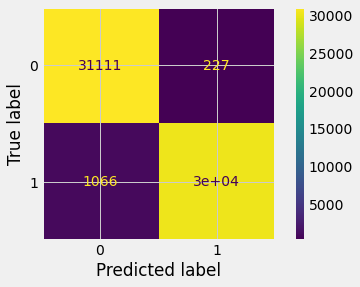




ROC AUC Score 0.9964897929122809
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.13781507380282582

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3258142305937584

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 30523.0, 'FP': 0.0, 'TN': 32177.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.137815,30523.0,32177.0,[0.8442009569378053],1.325814,[0.8442009569378053],0.137815


Charn values Original
1    5000
0    5000
Name: churn, dtype: int64
Total data: 10000

Charn values Train
1    3378
0    3322
Name: churn, dtype: int64
Total data: 6700

Charn values Test
0    1678
1    1622
Name: churn, dtype: int64
Total data: 3300


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8404999999999999
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1638
           1       0.85      0.83      0.84      1662

    accuracy                           0.84      3300
   macro avg       0.84      0.84      0.84      3300
weighted avg       0.84      0.84      0.84      3300


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    2086
0    1214
Name: gender, dtype: int64


              counter
churn gender         
0     0           653
      1           985
1     0           561
      1          1101
# # # # # # # # # # 
[[1395  283]
 [ 243 1379]]


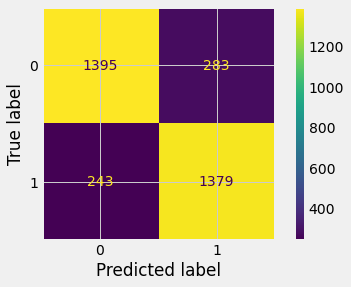




ROC AUC Score 0.9321575065142728
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.06569567888851857

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8755302578006814

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 1662.0, 'FP': 0.0, 'TN': 1638.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.065696,1662.0,1638.0,[0.7570909090909078],0.87553,[0.7570909090909078],-0.065696


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8958736842105264
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     29173
           1       0.93      0.87      0.90     33527

    accuracy                           0.89     62700
   macro avg       0.89      0.90      0.89     62700
weighted avg       0.90      0.89      0.89     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    39824
0    22876
Name: gender, dtype: int64


              counter
churn gender         
0     0         11897
      1         17276
1     0         10979
      1         22548
# # # # # # # # # # 
[[26948  4390]
 [ 2225 29137]]


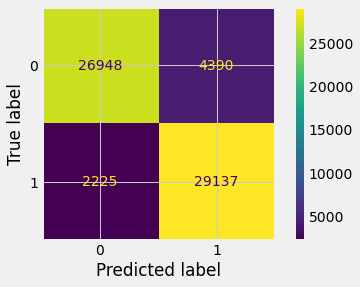




ROC AUC Score 0.9640971353728548
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.08625593808771886

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8476558240905927

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 33527.0, 'FP': 0.0, 'TN': 29173.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.086256,33527.0,29173.0,[0.8746220095693901],0.847656,[0.8746220095693901],-0.086256


Charn values Original
0    95000
1     5000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    63606
1     3394
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    31394
1     1606
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.96831
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     32084
           1       0.47      0.82      0.60       916

    accuracy                           0.97     33000
   macro avg       0.73      0.90      0.79     33000
weighted avg       0.98      0.97      0.97     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20046
0    12954
Name: gender, dtype: int64


              counter
churn gender         
0     0         12640
      1         19444
1     0           314
      1           602
# # # # # # # # # # 
[[31229   165]
 [  855   751]]


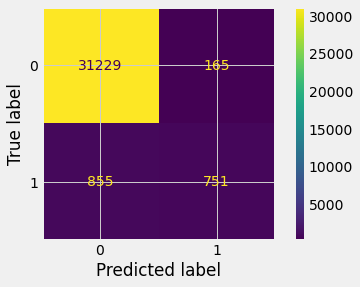




ROC AUC Score 0.9401956779424423
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.005791311756928496

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8071550905657996

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 916.0, 'FP': 0.0, 'TN': 32084.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.005791,916.0,32084.0,[0.9933212121212122],0.807155,[0.9933212121212122],-0.005791


Charn values Original
0    95000
1    94784
Name: churn, dtype: int64
Total data: 189784

Charn values Train
0    63708
1    63447
Name: churn, dtype: int64
Total data: 127155

Charn values Test
1    31337
0    31292
Name: churn, dtype: int64
Total data: 62629


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9536372758280613
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     30679
           1       0.97      0.95      0.96     31950

    accuracy                           0.96     62629
   macro avg       0.96      0.96      0.96     62629
weighted avg       0.96      0.96      0.96     62629


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33576
0    29053
Name: gender, dtype: int64


              counter
churn gender         
0     0         12176
      1         18503
1     0         16877
      1         15073
# # # # # # # # # # 
[[29592  1700]
 [ 1087 30250]]


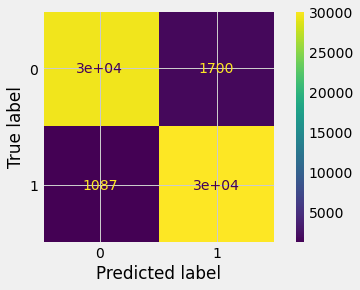




ROC AUC Score 0.9916357931740967
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.13198201640981477

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2939977564503378

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 31950.0, 'FP': 0.0, 'TN': 30679.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.131982,31950.0,30679.0,[0.8070797873189592],1.293998,[0.8070797873189592],0.131982


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9626052631578947
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     31745
           1       0.96      0.97      0.96     30955

    accuracy                           0.96     62700
   macro avg       0.96      0.96      0.96     62700
weighted avg       0.96      0.96      0.96     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33663
0    29037
Name: gender, dtype: int64


              counter
churn gender         
0     0         12597
      1         19148
1     0         16440
      1         14515
# # # # # # # # # # 
[[30368   970]
 [ 1377 29985]]


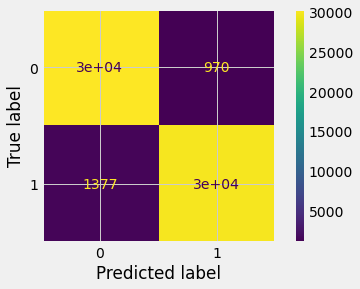




ROC AUC Score 0.9908899808339322
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.1349886168821659

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3130638518845574

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 30955.0, 'FP': 0.0, 'TN': 31745.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.134989,30955.0,31745.0,[0.8399266347687433],1.313064,[0.8399266347687433],0.134989


Charn values Original
1    5000
0    5000
Name: churn, dtype: int64
Total data: 10000

Charn values Train
1    3378
0    3322
Name: churn, dtype: int64
Total data: 6700

Charn values Test
0    1678
1    1622
Name: churn, dtype: int64
Total data: 3300


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.841
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1615
           1       0.86      0.83      0.85      1685

    accuracy                           0.85      3300
   macro avg       0.85      0.85      0.85      3300
weighted avg       0.85      0.85      0.85      3300


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    2086
0    1214
Name: gender, dtype: int64


              counter
churn gender         
0     0           636
      1           979
1     0           578
      1          1107
# # # # # # # # # # 
[[1392  286]
 [ 223 1399]]


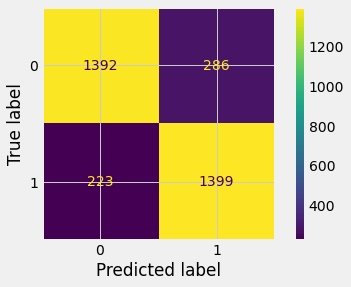




ROC AUC Score 0.9350547595708001
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.05456870230816252

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8971722556324959

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 1685.0, 'FP': 0.0, 'TN': 1615.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.054569,1685.0,1615.0,[0.7554545454545447],0.897172,[0.7554545454545447],-0.054569


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8516999999999999
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     30316
           1       0.87      0.84      0.86     32384

    accuracy                           0.85     62700
   macro avg       0.85      0.85      0.85     62700
weighted avg       0.85      0.85      0.85     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    39824
0    22876
Name: gender, dtype: int64


              counter
churn gender         
0     0         12302
      1         18014
1     0         10574
      1         21810
# # # # # # # # # # 
[[26228  5110]
 [ 4088 27274]]


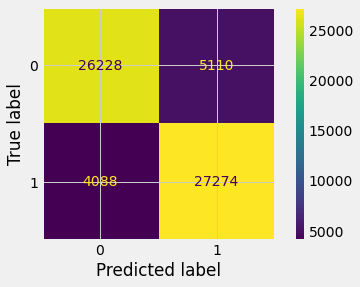




ROC AUC Score 0.941682021526991
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.08542854339826139

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8440116317151599

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 32384.0, 'FP': 0.0, 'TN': 30316.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.085429,32384.0,30316.0,[0.8736746411483385],0.844012,[0.8736746411483385],-0.085429


Charn values Original
0    95000
1     5000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    63606
1     3394
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    31394
1     1606
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9526299999999999
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     32809
           1       0.09      0.74      0.16       191

    accuracy                           0.95     33000
   macro avg       0.54      0.85      0.57     33000
weighted avg       0.99      0.95      0.97     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20046
0    12954
Name: gender, dtype: int64


              counter
churn gender         
0     0         12898
      1         19911
1     0            56
      1           135
# # # # # # # # # # 
[[31345    49]
 [ 1464   142]]


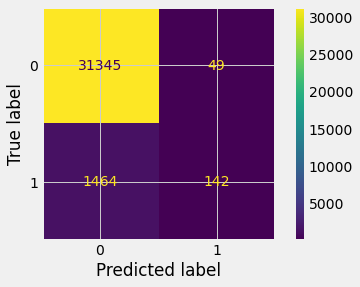




ROC AUC Score 0.9085431566707982
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.0024115215874262706

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.6419158389515036

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 191.0, 'FP': 0.0, 'TN': 32809.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.002412,191.0,32809.0,[0.9961575757575758],0.641916,[0.9961575757575758],-0.002412


Charn values Original
0    95000
1    94784
Name: churn, dtype: int64
Total data: 189784

Charn values Train
0    63708
1    63447
Name: churn, dtype: int64
Total data: 127155

Charn values Test
1    31337
0    31292
Name: churn, dtype: int64
Total data: 62629


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8264986386298879
              precision    recall  f1-score   support

           0       0.69      0.95      0.80     22661
           1       0.97      0.76      0.85     39968

    accuracy                           0.83     62629
   macro avg       0.83      0.85      0.82     62629
weighted avg       0.87      0.83      0.83     62629


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33576
0    29053
Name: gender, dtype: int64


              counter
churn gender         
0     0          8034
      1         14627
1     0         21019
      1         18949
# # # # # # # # # # 
[[21590  9702]
 [ 1071 30266]]


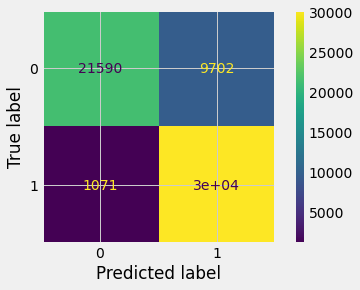




ROC AUC Score 0.9203323599661498
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.15910944936017413

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.2819282744058897

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 39968.0, 'FP': 0.0, 'TN': 22661.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.159109,39968.0,22661.0,[0.7674080697440262],1.281928,[0.7674080697440262],0.159109


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.8593999999999999
              precision    recall  f1-score   support

           0       0.75      0.92      0.83     25512
           1       0.94      0.79      0.86     37188

    accuracy                           0.84     62700
   macro avg       0.84      0.86      0.84     62700
weighted avg       0.86      0.84      0.85     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33663
0    29037
Name: gender, dtype: int64


              counter
churn gender         
0     0          9062
      1         16450
1     0         19975
      1         17213
# # # # # # # # # # 
[[23547  7791]
 [ 1965 29397]]


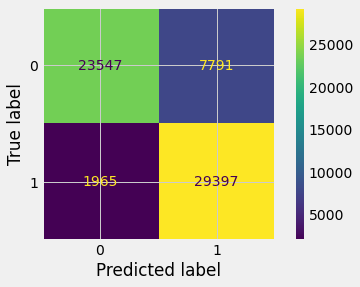




ROC AUC Score 0.929856101075503
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.17658250081300753

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3453376357908715

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 37188.0, 'FP': 0.0, 'TN': 25512.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.176583,37188.0,25512.0,[0.790401913875581],1.345338,[0.790401913875581],0.176583


Charn values Original
1    5000
0    5000
Name: churn, dtype: int64
Total data: 10000

Charn values Train
1    3378
0    3322
Name: churn, dtype: int64
Total data: 6700

Charn values Test
0    1678
1    1622
Name: churn, dtype: int64
Total data: 3300


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.796
              precision    recall  f1-score   support

           0       0.66      0.92      0.77      1203
           1       0.94      0.73      0.82      2097

    accuracy                           0.80      3300
   macro avg       0.80      0.82      0.79      3300
weighted avg       0.84      0.80      0.80      3300


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    2086
0    1214
Name: gender, dtype: int64


              counter
churn gender         
0     0           460
      1           743
1     0           754
      1          1343
# # # # # # # # # # 
[[1107  571]
 [  96 1526]]


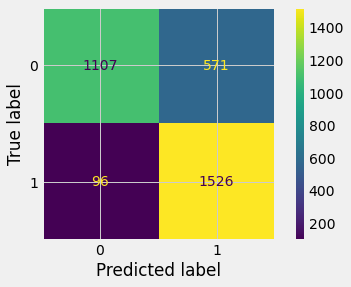




ROC AUC Score 0.8985676683386511
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.0227286009657226

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9646970501753557

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 2097.0, 'FP': 0.0, 'TN': 1203.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.022729,2097.0,1203.0,[0.7451515151515143],0.964697,[0.7451515151515143],-0.022729


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7981157894736842
              precision    recall  f1-score   support

           0       0.66      0.92      0.77     22413
           1       0.94      0.73      0.83     40287

    accuracy                           0.80     62700
   macro avg       0.80      0.83      0.80     62700
weighted avg       0.84      0.80      0.81     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    39824
0    22876
Name: gender, dtype: int64


              counter
churn gender         
0     0          8728
      1         13685
1     0         14148
      1         26139
# # # # # # # # # # 
[[20637 10701]
 [ 1776 29586]]


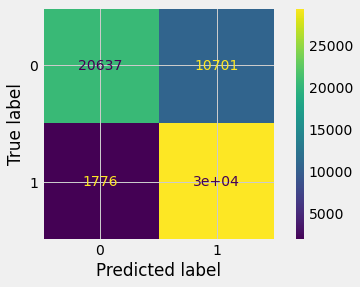




ROC AUC Score 0.9006733481345433
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.03789823062004383

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9422602572320048

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 40287.0, 'FP': 0.0, 'TN': 22413.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.037898,40287.0,22413.0,[0.8248931419457735],0.94226,[0.8248931419457735],-0.037898


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

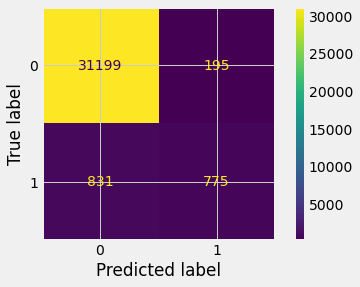




ROC AUC Score 0.9379042988836458
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.006960138046550365

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.7833494917994587

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 970.0, 'FP': 0.0, 'TN': 32030.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.00696,970.0,32030.0,[0.9902121212121213],0.783349,[0.9902121212121213],-0.00696


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:42:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

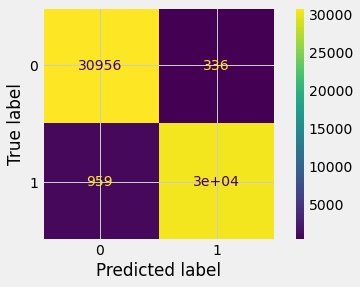




ROC AUC Score 0.996541940671913
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.1383617878988932

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3246199001113297

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 30714.0, 'FP': 0.0, 'TN': 31915.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.138362,30714.0,31915.0,[0.8175573616056375],1.32462,[0.8175573616056375],0.138362


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

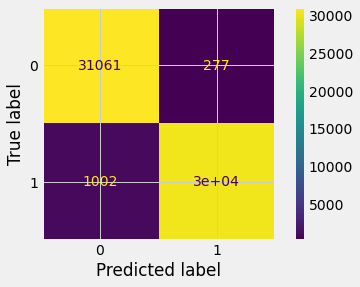




ROC AUC Score 0.9964929511635976
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.13879042806574787

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3270635057736977

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 30637.0, 'FP': 0.0, 'TN': 32063.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.13879,30637.0,32063.0,[0.8438118022328613],1.327064,[0.8438118022328613],0.13879


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

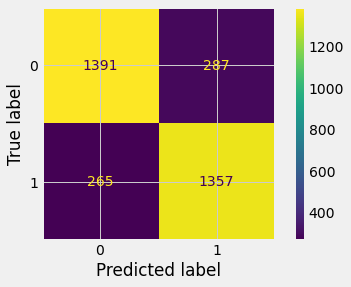




ROC AUC Score 0.9276401358554676
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.05446050472199543

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8949078512025139

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 1644.0, 'FP': 0.0, 'TN': 1656.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.054461,1644.0,1656.0,[0.7542424242424233],0.894908,[0.7542424242424233],-0.054461


C:\Users\ag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:52:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:52:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

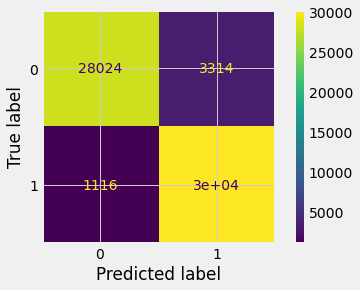




ROC AUC Score 0.9786961195253885
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.08426278282249205

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8511232891249813

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 33560.0, 'FP': 0.0, 'TN': 29140.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.084263,33560.0,29140.0,[0.8846092503987335],0.851123,[0.8846092503987335],-0.084263


Charn values Original
0    95000
1     5000
Name: churn, dtype: int64
Total data: 100000

Charn values Train
0    63606
1     3394
Name: churn, dtype: int64
Total data: 67000

Charn values Test
0    31394
1     1606
Name: churn, dtype: int64
Total data: 33000


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9426900000000001
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     31224
           1       0.48      0.43      0.45      1776

    accuracy                           0.94     33000
   macro avg       0.72      0.70      0.71     33000
weighted avg       0.94      0.94      0.94     33000


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    20046
0    12954
Name: gender, dtype: int64


              counter
churn gender         
0     0         12315
      1         18909
1     0           639
      1          1137
# # # # # # # # # # 
[[30383  1011]
 [  841   765]]


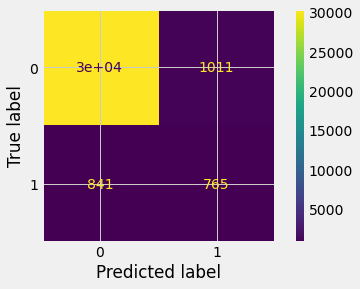




ROC AUC Score 0.7220675619894212
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.007391152271960688

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8696895000494952

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 1776.0, 'FP': 0.0, 'TN': 31224.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.007391,1776.0,31224.0,[0.9457999999999975],0.86969,[0.9457999999999975],-0.007391


Charn values Original
0    95000
1    94784
Name: churn, dtype: int64
Total data: 189784

Charn values Train
0    63708
1    63447
Name: churn, dtype: int64
Total data: 127155

Charn values Test
1    31337
0    31292
Name: churn, dtype: int64
Total data: 62629


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9554973301356073
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     30933
           1       0.97      0.96      0.96     31696

    accuracy                           0.96     62629
   macro avg       0.96      0.96      0.96     62629
weighted avg       0.96      0.96      0.96     62629


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33576
0    29053
Name: gender, dtype: int64


              counter
churn gender         
0     0         12297
      1         18636
1     0         16756
      1         14940
# # # # # # # # # # 
[[29951  1341]
 [  982 30355]]


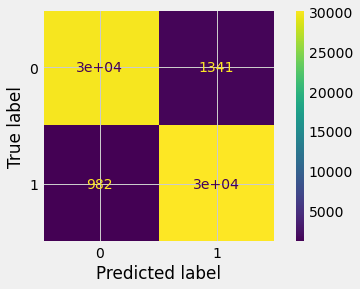




ROC AUC Score 0.9629037351602044
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.13177837688715943

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.296157348217086

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 31696.0, 'FP': 0.0, 'TN': 30933.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.131778,31696.0,30933.0,[0.8040811764517863],1.296157,[0.8040811764517863],0.131778


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9622894736842105
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     31006
           1       0.97      0.96      0.96     31694

    accuracy                           0.96     62700
   macro avg       0.96      0.96      0.96     62700
weighted avg       0.96      0.96      0.96     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    33663
0    29037
Name: gender, dtype: int64


              counter
churn gender         
0     0         12283
      1         18723
1     0         16754
      1         14940
# # # # # # # # # # 
[[29988  1350]
 [ 1018 30344]]


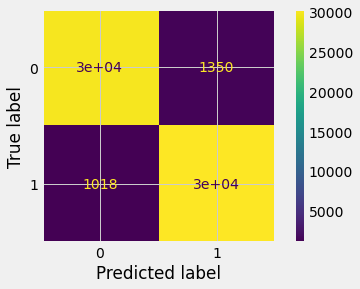




ROC AUC Score 0.9622287621222975
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference 0.13317726879426756

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  1.3000767335623447

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 31694.0, 'FP': 0.0, 'TN': 31006.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,0.133177,31694.0,31006.0,[0.8291961722488017],1.300077,[0.8291961722488017],0.133177


Charn values Original
1    5000
0    5000
Name: churn, dtype: int64
Total data: 10000

Charn values Train
1    3378
0    3322
Name: churn, dtype: int64
Total data: 6700

Charn values Test
0    1678
1    1622
Name: churn, dtype: int64
Total data: 3300


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.7998000000000001
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1733
           1       0.78      0.81      0.79      1567

    accuracy                           0.80      3300
   macro avg       0.80      0.80      0.80      3300
weighted avg       0.80      0.80      0.80      3300


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    2086
0    1214
Name: gender, dtype: int64


              counter
churn gender         
0     0           668
      1          1065
1     0           546
      1          1021
# # # # # # # # # # 
[[1376  302]
 [ 357 1265]]


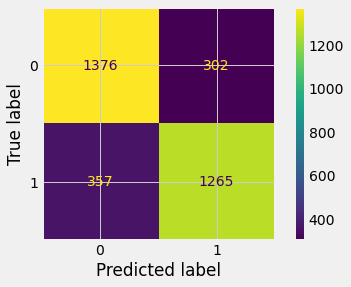




ROC AUC Score 0.7999625971262249
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.03970061648931211

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.9188878687593486

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 1567.0, 'FP': 0.0, 'TN': 1733.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.039701,1567.0,1733.0,[0.7437575757575743],0.918888,[0.7437575757575743],-0.039701


Charn values Original
1    95000
0    95000
Name: churn, dtype: int64
Total data: 190000

Charn values Train
0    63662
1    63638
Name: churn, dtype: int64
Total data: 127300

Charn values Test
1    31362
0    31338
Name: churn, dtype: int64
Total data: 62700


*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_
Mean scores : 0.9836526315789473
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     30076
           1       1.00      0.96      0.98     32624

    accuracy                           0.98     62700
   macro avg       0.98      0.98      0.98     62700
weighted avg       0.98      0.98      0.98     62700


 Gender Count in predited value with X_test set
# # # # # # # # # # 
1    39824
0    22876
Name: gender, dtype: int64


              counter
churn gender         
0     0         11988
      1         18088
1     0         10888
      1         21736
# # # # # # # # # # 
[[30076  1262]
 [    0 31362]]


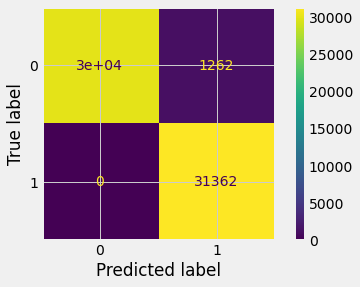




ROC AUC Score 0.9798627749163654
 *  *  *  *  *  *  *  *  *  * 
[{'gender': 1}]

 AIF 360 

 Statistical parity difference -0.06984419151909593

 True possitve rate 1.0 	 True negative rate 1.0 

 Desparate impact  0.8720337190349431

 Equal opportunity difference  0.0

 Average odds difference  0.0

 Theil Index  0.0

 Binary Confusion Matric 
{'TP': 32624.0, 'FP': 0.0, 'TN': 30076.0, 'FN': 0.0}

 ..........................


,Attribute,Mean difference,Positive Outcome,Negative,Differences,Disparate impact,Consistency,Statistical parity dif
0,gender,-0.069844,32624.0,30076.0,[0.9056682615630027],0.872034,[0.9056682615630027],-0.069844


In [6]:
for name, model in models:
    display(HTML(f'<h2> {name} </h2>'))
    for method in methods:
        display(HTML(f'<h3>{method} </h3>'))
        X, y = make_sampling(method, X_original, y_original)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)
        score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
        
        print('Charn values Original')
        print(y.value_counts())
        print('Total data: {}'.format(y.count()))
        
        print('\nCharn values Train')
        print(y_train.value_counts())
        print('Total data: {}'.format(y_train.count()))
        
        print('\nCharn values Test')
        print(y_test.value_counts())
        print('Total data: {}'.format(y_test.count()))
        
        print("\n")
        print("*_" * 20)
        print(f"Mean scores : {score.mean()}")

        model.fit(X_train, y_train)

        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        print(metrics.classification_report(y_pred_test, y_test))
        
        pred_df = X_test.copy()
        pred_df['churn'] = y_pred_test
        
        print('\n Gender Count in predited value with X_test set')
        print('# ' * 10)
        print(pred_df.gender.value_counts())
        p_df = pred_df[['churn', 'gender']]
        print('\n')
        p_df.insert(2, 'counter', 1)
        print(p_df.groupby(['churn','gender',]).sum())
        print('# ' * 10)
        
        print(metrics.confusion_matrix(y_test, y_pred_test))
        metrics.plot_confusion_matrix(model, X_test, y_test)
        plt.show()

        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc_score = metrics.roc_auc_score(y_test, y_proba)
        print('\n\n')
        print(f'ROC AUC Score {roc_auc_score}')
        

        # Additional matrix
        df_pred = X_test
        df_pred.reset_index(drop=True, inplace=True)
        
        pred = pd.Series(y_pred_test)
        df_pred = df_pred.assign(churn=pred)
        
        # df_pred = df_pred.assign(churn=y_test)
        
        aif_df = TMDataset(data_frame=df_pred)
        aif_df_labeled = aif_df.copy()
        aif_df_labeled.labels = y_pred_test
        
        result_tbl_cols = [
            'Attribute',
            'Mean difference', 
            'Positive Outcome',
            'Negative', 
            'Differences', 
            'Disparate impact', 
            'Consistency',
            'Statistical parity dif',
        ]

        result_rows = []
        for p_attribute in aif_df.protected_attribute_names:
            result_row = []
            privileged_groups = [{p_attribute: 1}]
            print(' * ' * 10)
            print(privileged_groups)
            unprivileged_groups = [{p_attribute: 0}]
            
            metric_orig_train = BinaryLabelDatasetMetric(
                aif_df,  unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
            
            clsf_metric = ClassificationMetric(
                aif_df, aif_df_labeled, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
            
            print('\n AIF 360 ')
            print('\n Statistical parity difference', clsf_metric.statistical_parity_difference())
           
            print('\n True possitve rate {} \t True negative rate {} '.format(
                clsf_metric.true_positive_rate(), clsf_metric.true_negative_rate()))
            
            print('\n Desparate impact ', clsf_metric.disparate_impact())
            print('\n Equal opportunity difference ', clsf_metric.equal_opportunity_difference())
            print('\n Average odds difference ', clsf_metric.average_odds_difference())
            print('\n Theil Index ', clsf_metric.theil_index())
            print('\n Binary Confusion Matric ')
            print(clsf_metric.binary_confusion_matrix())
            print('\n ..........................')

            text_expl = MetricTextExplainer(metric_orig_train)
            
            result_row.append(p_attribute)
            result_row.append(metric_orig_train.mean_difference())
            result_row.append(metric_orig_train.num_positives())
            result_row.append(metric_orig_train.num_negatives())

            # this is to shutup the warning msg from sklearn
            with warnings.catch_warnings():
                warnings.simplefilter('ignore', FutureWarning)
                result_row.append(metric_orig_train.consistency())
                
            result_row.append(metric_orig_train.disparate_impact())
            result_row.append(metric_orig_train.consistency())
            result_row.append(metric_orig_train.statistical_parity_difference())

            result_rows.append(result_row)

        result_df = pd.DataFrame(result_rows, columns=result_tbl_cols)
        display(result_df)
        # End Aif matrix

In [7]:
# pred_df.group_by(['churn'])
print(pred_df.gender.value_counts())
p_df = pred_df[['churn', 'gender']]
p_df.insert(2, 'counter', 1)
p_df.groupby(['churn','gender',]).sum()

1    39824
0    22876
Name: gender, dtype: int64


counter
churn gender         
0     0         11988
      1         18088
1     0         10888
      1         21736